# Non-Linear Terms

Open in Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/econ2025/blob/main/09-Non-Linear-Terms.ipynb)

## Simpson's paradox

The data set `gdp2019` contains the GDP per capita in current prices for 142 countries in 2019. In addition, the variable `spending` shows the government spending in these countries as a share (in percent) of GDP.

-   `gdppc` (numeric): [GDP per capita](https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD) in USD (current prices)
-   `spending` (numeric): [Government spending as a share of GDP](https://www.imf.org/external/datamapper/exp@FPP/USA/FRA/JPN/GBR/SWE/ESP/ITA/ZAF/IND).

The data set was constructed using data from the IFM. You can find more information about the two variables by following the links above.

We want to explore the relationship between `gdppc` and `spending`.


In [ ]:
library(tidyverse)

## Simpson's paradox (1)

berkley <- read_csv(
  "https://waf.cs.illinois.edu/discovery/berkeley.csv"
  ) %>%
  mutate(
    is_rejected = ifelse(Admission == "Accepted", 0, 1),
  )

berkley %>% head()

In [60]:
berkley %>%
  group_by(Gender) %>%
    summarize(
        n = n(),
        n_rejected = sum(is_rejected),
        p_rejected = round(mean(is_rejected), 2)
    )

Gender,n,n_rejected,p_rejected
<chr>,<int>,<dbl>,<dbl>
F,4321,2827,0.65
M,8442,4704,0.56


In [ ]:
admission_by_major_gender <- berkley %>%
  group_by(Major, Gender) %>%
    summarize(
        n = n(),
        n_rejected = sum(is_rejected),
        p_rejected = mean(is_rejected)
    )
admission_by_major_gender

In [ ]:
admission_by_major_gender %>%
  ggplot(aes(x = Major, y = p_rejected, fill=Gender)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(
      y = "Admission rate",
      x = "Major"
    ) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Regression with Categorical Variables



In [61]:
berkley %>% head()

Year,Major,Gender,Admission,is_rejected
<dbl>,<chr>,<chr>,<chr>,<dbl>
1973,C,F,Rejected,1
1973,B,M,Accepted,0
1973,Other,F,Accepted,0
1973,Other,M,Accepted,0
1973,Other,M,Rejected,1
1973,Other,M,Rejected,1


In [62]:
model_matrix <- model.matrix(lm(is_rejected ~ 0 + Gender, data = berkley))
model_matrix %>% head()

,GenderF,GenderM
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
6,0,1


In [63]:
berkey <- berkley %>%
  bind_cols(model_matrix)
berkey %>% head()

Year,Major,Gender,Admission,is_rejected,GenderF,GenderM
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1973,C,F,Rejected,1,1,0
1973,B,M,Accepted,0,0,1
1973,Other,F,Accepted,0,1,0
1973,Other,M,Accepted,0,0,1
1973,Other,M,Rejected,1,0,1
1973,Other,M,Rejected,1,0,1


In [64]:
lm(is_rejected ~ Gender, data = berkley) %>%
  summary()


Call:
lm(formula = is_rejected ~ Gender, data = berkley)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6542 -0.5572  0.3458  0.4428  0.4428 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.65425    0.00745   87.82   <2e-16 ***
GenderM     -0.09703    0.00916  -10.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4897 on 12761 degrees of freedom
Multiple R-squared:  0.008717,	Adjusted R-squared:  0.008639 
F-statistic: 112.2 on 1 and 12761 DF,  p-value: < 2.2e-16


## Simpson's paradox (2)

The data set `gdp2019` contains the GDP per capita in current prices for 142 countries in 2019. In addition, the variable `spending` shows the government spending in these countries as a share (in percent) of GDP.

-   `gdppc` (numeric): [GDP per capita](https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD) in USD (current prices)
-   `spending` (numeric): [Government spending as a share of GDP](https://www.imf.org/external/datamapper/exp@FPP/USA/FRA/JPN/GBR/SWE/ESP/ITA/ZAF/IND).

The data set was constructed using data from the IFM. You can find more information about the two variables by following the links above.

We want to explore the relationship between `gdppc` and `spending`.

In [ ]:
gdp2019 <- read_csv(
  "https://raw.githubusercontent.com/feb-sofia/econometrics-2023/main/data/gdpgov2019.csv"
  ) %>%
  filter(!is.na(spending))

gdp2019 %>% head()

1.  Create a scatterplot for the two variables and add the estimated regression line for the model

$$
\text{gdppc}_i = \beta_0 + \beta_1 \text{spending}_i + e_i, \quad e_i \sim N(0, \sigma^2)
$$


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_smooth()`).”


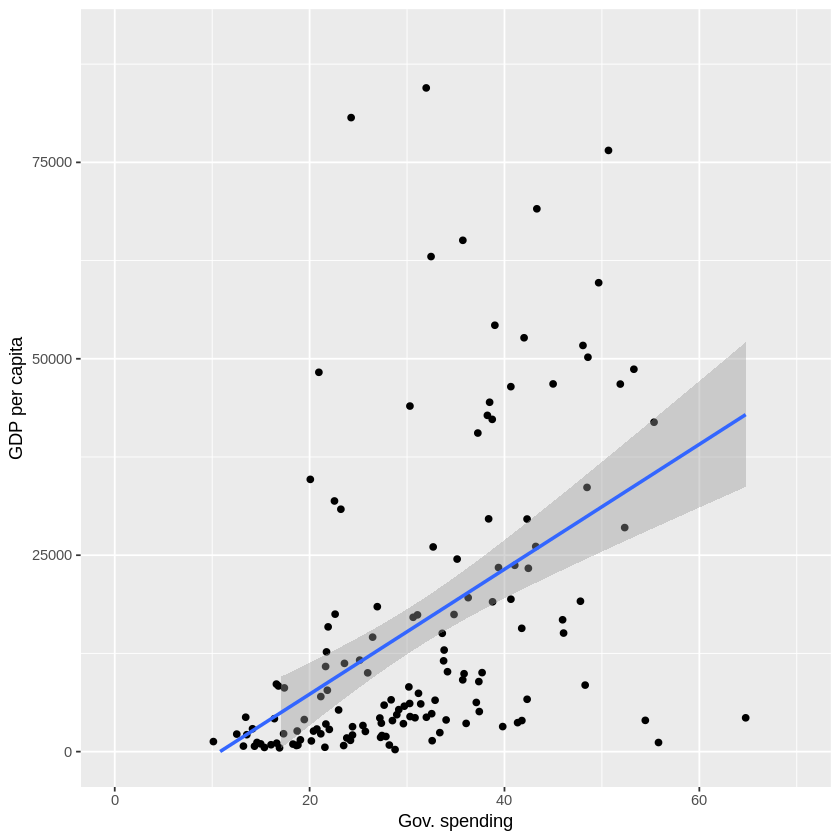

In [65]:
gdp2019 %>%
  ggplot(aes(x = spending, y = gdppc)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(
    y = "GDP per capita",
    x = "Gov. spending"
  ) +
  lims(
    x = c(0, 70),
    y = c(0, 90000)
  )

In [66]:
# Estimate the model


2.  Create a new variable called `gdppc_gr` that has five categories:

-   Low: if $\text{gdppc} \leq 1025$
-   Medium-low: if $1025 < \text{gdppc} \leq 3995$
-   Medium-high: if $3995 < \text{gdppc} \leq 12375$
-   High: if $12375 < \text{gdppc} \leq 30000$
-   Very high: if $\text{gdppc} > 30000$

In [67]:
gdp2019 <- gdp2019 %>%
  mutate(
    gdppc_gr = cut(
      gdppc,
      breaks = c(0, 1025, 3995, 12375, 30000, Inf),
      labels = c("Low", "Medium-low", "Medium-high", "High", "Very high"))
  )
table(gdp2019$gdppc_gr)


        Low  Medium-low Medium-high        High   Very high 
         13          36          40          26          27 

4.  Estimate the following linear model and interpret the estimated coefficients

$$
\text{gdppc}_i = \beta_0 + \beta_{\text{gdppc_gr}[i]} + e_i, e_i \sim N(0, \sigma^2)
$$

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_smooth()`).”


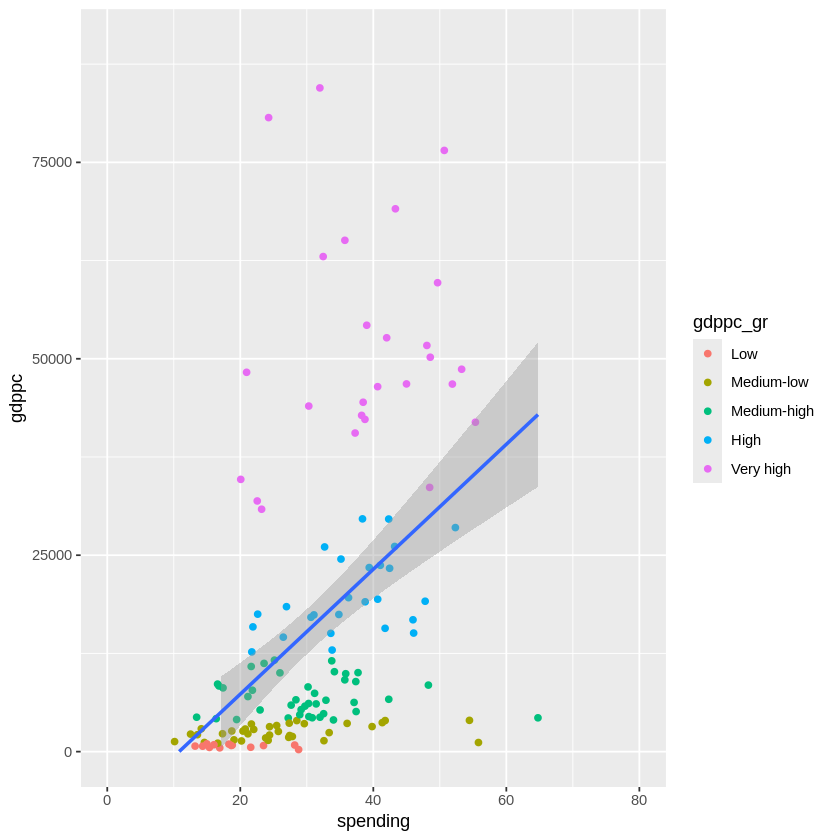

In [71]:
gdp2019 %>%
  ggplot(aes(x = spending, y = gdppc)) +
  geom_point(aes( color = gdppc_gr)) +
  geom_smooth(method = "lm") +
  # geom_abline(
  #   intercept = c(-144.39, 1308.32, 5835.94, 18460.21, 51920.69),
  #   slope = 44.80,
  #   alpha = 0.5
  # ) +
  lims(
    x = c(0, 80),
    y = c(0, 90000)
  )

## Interaction Effects


In [72]:
# Load the data
stu <- read.csv("https://raw.githubusercontent.com/febse/data/main/econ/drinking.csv") %>%
  mutate(
    sex = ifelse(male == 1, "Male", "Female")
  )

# Print the first few rows
stu %>% head()

,male,drink,gpa,malegpa,sex
,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,5,3.20,3.20,Male
2,0,9,3.00,0.00,Female
3,1,29,2.85,2.85,Male
4,0,22,NA,NA,Female
5,0,19,NA,NA,Female
6,1,19,NA,NA,Male


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 25 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 25 rows containing missing values or values outside the scale range
(`geom_point()`).”


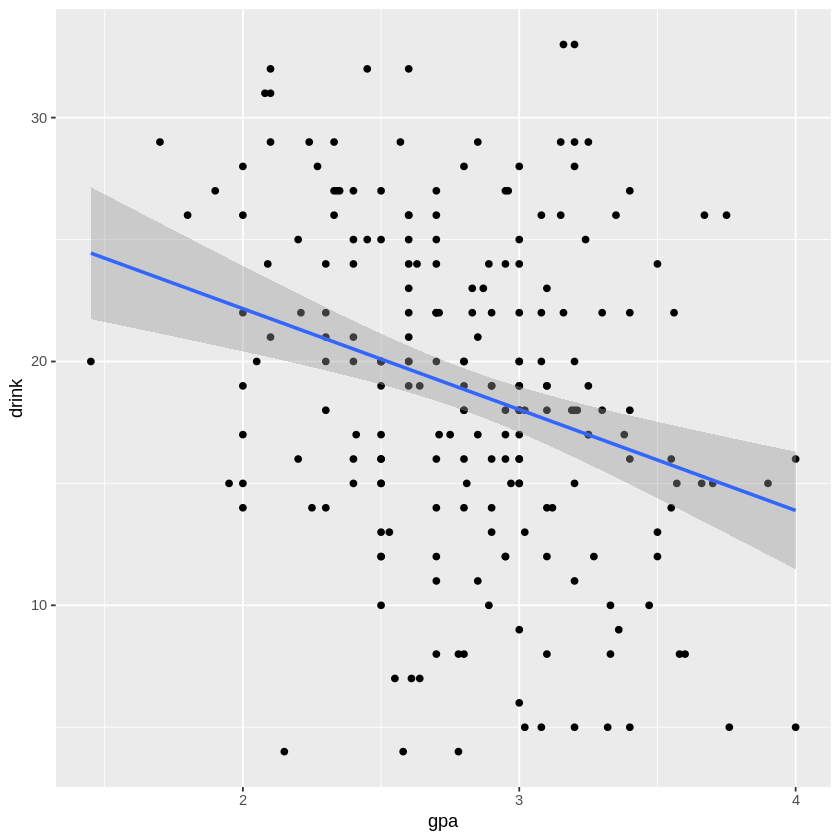

In [73]:
stu %>%
  ggplot(aes(x=gpa, y=drink)) +
    geom_point() +
    geom_smooth(method=lm)

Estimate and iterpret the results of the following models:

- $\text{drink}_i = \beta_0 + \beta_1\text{gpa}_i + e_i$
- $\text{drink}_i = \beta_0 + \beta_1 \text{sexMale}_i + e_i$
- $\text{drink}_i =\beta_0 + \beta_1 \text{gpa}_i + \beta_2 \text{sexMale}_i + e_i$
- $\text{drink}_i = \beta_0 + \beta_1 \text{gpa}_i + \beta_2 \text{sexMale}_i +
\beta_3 \text{gpa}_i \cdot \text{sexMale}_i$


Call:
lm(formula = drink ~ sex, data = stu)

Coefficients:
(Intercept)      sexMale  
     17.313        3.998  


## Polynomial regression

In the following we will simulate 100 observations from the following model

$$
y_i = 2 + x_i + x^2 + e_i, e_i \sim N(0, 1)
$$



In [ ]:
## Create the simulated sample
sim_n <- 100

poly_dt <- tibble(
  x = runif(n = sim_n, min = -4, max = 3),
  y = 2 +  x +  x^2 + rnorm(n = sim_n, mean = 0, sd = 1)
)

poly_dt %>%
  ggplot(aes(x = x, y = y)) +
  geom_point()



2.  Estimate a linear model for `x` and `y`

$$
y_i = \beta_0 + \beta_1 x_i, e_i \sim N(0, \sigma^2)
$$


In [ ]:
# fit1_pred <- predict(
#   fit1,
#   interval = "confidence"
#   ) %>%
#   as_tibble() %>%
#   bind_cols(poly_dt) %>%
#   mutate(
#     res = y - fit
#   )

In [ ]:
# fit1_pred %>%
#   ggplot(aes(x = fit, y = res)) +
#   geom_point() +
#   geom_hline(yintercept = 0, alpha = 0.5, lty = 2) +
#   labs(
#     x = "Predicted",
#     y = "Residual"
#   )


3.  Add a quadratic term to the linear model and estimate it

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x^2_i + e_i, e_i \sim N(0, \sigma^2)
$$


In [ ]:
# fit2_pred <- predict(fit2, interval = "confidence") %>%
#   as_tibble() %>%
#   bind_cols(poly_dt) %>%
#   mutate(
#     res = y - fit
#   )

In [ ]:
# fit2_pred %>%
#   ggplot(aes(x = x, y = y)) +
#   geom_point() +
#   geom_line(
#     aes(y = fit),
#     color = "steelblue2"
#   ) +
#   geom_ribbon(
#     aes(ymin = lwr, ymax = upr),
#     alpha = 0.2,
#     fill = "steelblue2"
#   )

In [ ]:
# fit2_pred %>%
#   ggplot(aes(x = fit, y = res)) +
#   geom_point() +
#   geom_hline(yintercept = 0, alpha = 0.5, lty = 2) +
#   labs(
#     x = "Predicted",
#     y = "Residual"
#   )

4.  Add the third and fourth degree polynomial terms to the model and estimate it

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x^2_i + \beta_3 x^3_i + \beta_4 x^4_i + e_i, e_i \sim N(0, \sigma^2)
$$

In [ ]:
# fit3_pred <- predict(fit3, interval = "confidence") %>%
#   as_tibble() %>%
#   bind_cols(poly_dt) %>%
#   mutate(
#     res = y - fit
#   )

In [ ]:
# fit3_pred %>%
#   ggplot(aes(x = x, y = y)) +
#   geom_point() +
#   geom_line(
#     aes(y = fit),
#     color = "steelblue2"
#   ) +
#   geom_ribbon(
#     aes(ymin = lwr, ymax = upr),
#     alpha = 0.2,
#     fill = "steelblue2"
#   )

In [ ]:
# fit3_pred %>%
#   ggplot(aes(x = fit, y = res)) +
#   geom_point() +
#   geom_hline(yintercept = 0, alpha = 0.5, lty = 2) +
#   labs(
#     x = "Predicted",
#     y = "Residual"
#   )

## Model choice

1.  $R^2$

$$
R^2 = 1 - \frac{RSS}{TSS} \\
RSS = \sum_{i = 1}^{n}(y_i - \hat{y}_i)^2 \\
TSS = \sum_{i = 1}^{n}(y_i - \bar{y})^2
$$

Compute $R^2$ for the three models. Which model fits the data best according to it?


In [ ]:
sim_noconst <- tibble(
  y = 2 + rnorm(n = 100, mean = 0, sd = 1),
  x = runif(n = 100)
)

sim_noconst %>%
  ggplot(aes(x = x, y = y)) +
  geom_point()

2.  Adjusted $R^2$

$$
R^2_{ADJ} = 1 - \frac{n - 1}{n - p - 1} \frac{RSS}{TSS}
$$

3.  Information Criteria

Compute the Akaike information criterion (AIC) for the three models and choose the best one.

$$
\text{AIC} = n \log\left(\frac{RSS}{n}\right) + 2p + n + n \log(2\pi).
$$

In [ ]:
AIC(fit1)
AIC(fit2)
AIC(fit3)

In [ ]:
smpl <- sample(1:100, 20)
poly_dt_estim <- poly_dt[smpl, ]
poly_dt_test <- poly_dt[-smpl, ]

fit2_estim <- lm(y ~ poly(x, 4), data = poly_dt_estim)
fit5_test <- lm(y ~ poly(x, 4), data = poly_dt_test)

pred2 <- predict(fit2_estim, newdata = poly_dt_estim)
pred5 <- predict(fit2_estim, newdata = poly_dt_estim)
